In [1]:
import pandas as pd
import cbsodata
import matplotlib.pyplot as plt
import numpy as np
import functools as ft
from datetime import datetime

todayDate = datetime.today().strftime('%Y_%m_%d')
pd.set_option('display.max_columns', 40)

In [10]:
###################################
# https://cbsodata.readthedocs.io/en/latest/readme_link.html

# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cpb.nl/sites/default/files/publicaties/download/cpb-technical-background-document-bvar-models-used-cpb.pdf
###################################

#### GDP
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84105NED/table?ts=1706684088769
# https://opendata.cbs.nl/statline#/CBS/nl/dataset/84087NED/table?ts=1696490590802

In [2]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

{'ID': 0, 'Title': 'Bbp, productie en bestedingen; kwartalen, waarden, nationale rekeningen', 'ShortTitle': 'Bbp; kwartalen, waarden', 'Identifier': '85879NED', 'Summary': 'Productie, bestedingen, inkomen, economische relaties met het\nbuitenland en aanvullende detailgegevens; High Value Dataset – Statistiek', 'Modified': '2024-11-14T09:30:00', 'ReasonDelivery': 'ActualiseringBijzonder', 'ExplanatoryText': '', 'Language': 'nl', 'Catalog': 'CBS', 'Frequency': 'Perkwartaal', 'Period': '1995 - 2023, KwI 1995 - KwIII 2024', 'ShortDescription': '\nDeze tabel bevat kwartaal- en jaargegevens over de productiecomponenten, de bestedingencategorieën en de inkomensbestanddelen van het bruto binnenlands product van Nederland. De volumeontwikkeling van het bruto binnenlands product is de maatstaf voor de economische groei van een land. Het is in de nationale rekeningen en dus ook in de kwartaalrekeningen gebruikelijk om het bruto binnenlands product vanuit drie gezichtspunten te benaderen, vanuit d

C:\Users\jpark\AppData\Local\Temp\ipykernel_18068\681159290.py:18: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')
C:\Users\jpark\AppData\Local\Temp\ipykernel_18068\681159290.py:27: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gdp_total.index = pd.date_range(start=start_date, periods = gdp_total.shape[0], freq="Q").to_period('Q')


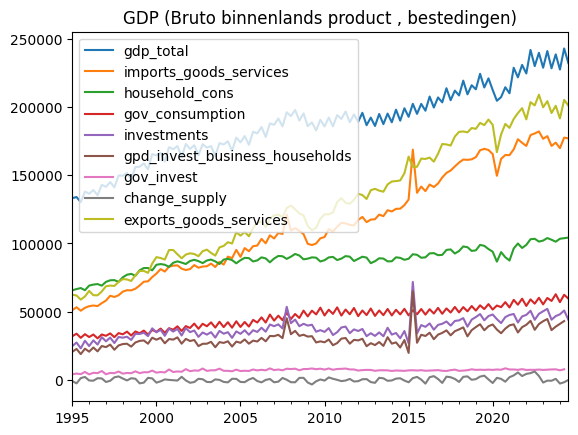

9


C:\Users\jpark\AppData\Local\Temp\ipykernel_18068\681159290.py:48: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df.plot(subplots=True, ax=axes, sharex=True)


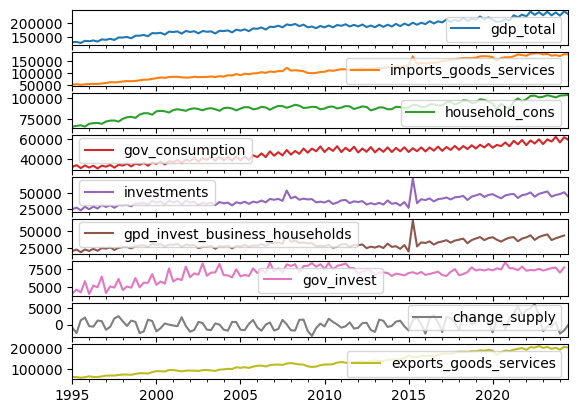

In [ ]:
def macro_data_cbs(identifier, verbose = False):
    start_date = '01/01/1995'

    if verbose:
        info = cbsodata.get_info(identifier)
        print(info)
        tables = pd.DataFrame(cbsodata.get_table_list())

    # get data
    data = pd.DataFrame(cbsodata.get_data(identifier))

    if verbose:
        data.to_csv(output + "unprocessed_data.csv")
        print(data.Perioden)

    data = data[data["SoortGegevens"] == 'Prijsniveau 2021']
    data = data[data['Perioden'].str.contains('kwartaal')]
    data.index = pd.date_range(start = start_date, periods = data.shape[0], freq = "Q").to_period('Q')

    gdp_total = data[['BrutoBinnenlandsProduct_2', 'Goederen_4', 'Diensten_5', 'Huishoudens_9', 'Overheid_10', 'BedrijvenEnHuishoudens_12', 'Totaal_11', 'BedrijvenEnHuishoudens_12', 'Overheid_13', 'VeranderingInVoorraden_14', 'Goederen_16', 'Diensten_17']]

    gdp_total.columns = ['gdp_total', 'imports_goods, imports_services', 'household_cons', 'gov_consumption', 'total_investments', 'business_and_household_investments', 'gov_investments', 'change_supply', 'exports_goods', 'exports_services']

    ######################
    # Set data index
    ######################
    gdp_total.index = pd.date_range(start=start_date, periods = gdp_total.shape[0], freq="Q").to_period('Q')
    # this adds one day, so that we can go to the first of a month
    gdp_total.index = pd.PeriodIndex(gdp_total.index, freq='Q').to_timestamp() #+ datetime.timedelta(days=1) #pd.offsets.QuarterEnd()

    return gdp_total

NLD_basic_macro_data = macro_data_cbs(identifier = '85879NED', verbose = True)
NLD_basic_macro_data.to_csv(output + "cbs_basic_macro_NOT_SEASONCORRECTED_qt.csv")
print("2015, seasonably adjusted")

NLD_basic_macro_data.plot()
plt.title('GDP (Bruto binnenlands product , bestedingen)')
plt.savefig(figures + "NLD_basic_macro_data.png")
plt.show()

#################
#################
df = NLD_basic_macro_data.copy()
print(df.shape[1])

fig, axes = plt.subplots(nrows=df.shape[1], ncols=1)
df.plot(subplots=True, ax=axes, sharex=True)
plt.show()